# Experts in Teams

## version 1:
$\begin{align}
&\min E(Q,T)=\int_{t_1}^{t_F}\int_\Omega p(t)Q(x,t)\,\mathrm{d}x\mathrm dt+\frac\gamma2\int_\Omega |T(x,t_F)-T_\text{fin}(x)|^2\mathrm dx \\
&\begin{cases}
\rho c\dot T(x,t)&=\nabla\cdot\left(k(x)\nabla T(x,t)\right)+Q(x,t) && \text{in}\ \Omega\times(0,t_F) \\
-k(x)\partial_\nu T(x,t)&=h(x)\left(T(x,t)-T_\text{out}(x,t)\right) && \text{on}\ \partial\Omega\times[0,t_F]\\
T(x,0)=T_\text{ini}(x)&
\end{cases}\tag{SE}\\
& Q\in U_\text{ad}=\{Q\in L^2(\Omega\times(0,t_F))\,|\,0\leq Q(x,t)\leq Q_\text{max}(x)\ \text{a.e.}\}\\
&\text{optional}:\ T(x,t_F)\geq T_\text{fin}(x) (\text{optional if second part of E should be strict})
\end{align}$
where
$T(x,t)$ temperature in K (Henning: I will use °C, but written K is better), $Q(x,t)$ heating output in $\frac W {m^3}$, $p(t)$ price, $\rho$ density in $\frac{kg}{m^3}$, $c$ heat capacity in $\frac{J}{kg\cdot K}$, $k(x)$ heat transfer coefficient in $\frac W{m\cdot K}$, $h(x)$ convective heat transfer coefficient in $\frac W{m^2K}$, $t_1$ morning start time

Remember that $\partial_\nu T$ is the outer normal derivative with respect to $x$ and any initial data (or end data) would have to satisfy the PDE.

In order to solve the (SE) we will use a more basic method, in which we seperate between the spacial and temporal derivatives and first solve the PDE in space using approximations of the time derivatives and then the ODE in time or we try to decouple both variables as much as possible to get a linear system in block structure. This is done by Gridap automatically. Thus, we need the weak formulation only in space (so a semi-weak formulation of the whole system). Here we will give it in its weak form remarking that every time integral of the (WF) for the (SWF) would be replaced by "for all $t\in(0,t_F)$", because computing the derivative of the energy functional is easier this way without loosing track of the $t$, and get with the test space $H^1_{\Gamma}(\Omega\times(0,t_F))$ where $\Gamma=\Omega\times\{0\}$
$\begin{align}
\int\limits_0^{t_F}\int\limits_\Omega \rho c\dot T(x,t)\phi(x,t)\,\mathrm dx\mathrm dt&=\int\limits_0^{t_F}\int\limits_\Omega \nabla\cdot(k(x)\nabla T(x,t)) \phi(x,t)+Q(x,t)\phi(x,t)\,\mathrm dx\mathrm dt\\ 
&=\int\limits_0^{t_F}\int\limits_\Omega -k(x)\nabla T(x,t)\cdot\nabla\phi(x,t)+Q(x,t)\phi(x,t)\,\mathrm dx\mathrm dt+\int\limits_0^{t_F}\int\limits_{\partial\Omega} k(x)\partial_\nu T(y,t) \phi(x,t)\,\mathrm dy\mathrm dt \\
&=\int\limits_0^{t_F}\int\limits_\Omega -k(x)\nabla T(x,t)\cdot\nabla\phi(x,t)+Q(x,t)\phi(x,t)\,\mathrm dx\mathrm dt-\int\limits_0^{t_F}\int\limits_{\partial\Omega} h(y)(T(y,t)-T_\text{out}(y,t)) \phi(x,t)\,\mathrm dy\mathrm dt 
\end{align}$
giving us the weak formulation
$\begin{align}
\int\limits_0^{t_F}\int\limits_\Omega \rho c\dot T(x,t)\phi(x,t)\,\mathrm dx\mathrm dt=\int\limits_0^{t_F}\int\limits_\Omega -k(x)\nabla T(x,t)\cdot\nabla \phi(x,t)+Q(x,t)\phi(x,t)\,\mathrm dx\mathrm dt-\int\limits_0^{t_F}\int\limits_{\partial\Omega} h(y)\left(T(y,t)-T_\text{out}(y)\right)\phi(y,t)\,\mathrm dy\mathrm dt \tag{WF}
\end{align}$
and thus
$\begin{align}
&a_\text{SE}(T,\phi)=\int\limits_0^{t_F}\int\limits_\Omega \rho c\dot T(x,t)\phi(x,t)+k(x)\nabla T(x,t)\cdot\nabla \phi(x,t)\,\mathrm dx\mathrm dt+\int\limits_0^{t_F}\int\limits_{\partial\Omega} h(y)T(y,t)\phi(y,t)\,\mathrm dy\mathrm dt,\qquad\qquad\\
&l_\text{SE}(\phi)=\int\limits_0^{t_F}\int\limits_\Omega Q(x,t)\phi(x,t)\,\mathrm dx\mathrm dt+\int\limits_0^{t_F}\int\limits_{\partial\Omega} h(y)T_\text{out}(y)\phi(y,t)\,\mathrm dy\mathrm dt
\end{align}$
Henning: remember that each boundary integral could be rewritten with the Trace operator, might be helpful for the next part. When writing the (SWF) the open interval for $∀ t\in(0,t_F)$ is important.

From the optimisation functional and the (WF) we get the Lagrangian as
$\begin{align}
L(T,q,W)=\int\limits_{t_1}^{t_F}\int\limits_\Omega p(t)Q(x,t)\,\mathrm{d}x\mathrm dt+\frac\gamma2\int\limits_\Omega |T(x,t_F)-T_\text{fin}(x)|^2\mathrm dx+\int\limits_0^{t_F}\int\limits_\Omega \rho c\dot T(x,t)W(x,t)+k(x)\nabla T(x,t)\cdot\nabla W(x,t)-Q(x,t)W(x,t)\,\mathrm dx\mathrm dt+\int\limits_0^{t_F}\int\limits_{\partial\Omega} h(y)\left(T(y,t)-T_\text{out}(y)\right)W(y,t)\,\mathrm dy\mathrm dt
\end{align}$
which gives us the weak formulation of the adjoint (AE) as (notice that the second term contains $\dot\psi$ which in the (SWF) would be zero and thus needs to be solved differently: in that case we are actually only looking for the derivative of the $x$ dendent $T$, so that the derivative $\partial_{T(x)}T(x,t)$ does not give 1 but a time dependent function)
$\begin{align}
L_T(T,Q,W)\psi=\gamma\int\limits_\Omega \left(T(x,t_F)-T_\text{fin}(x)\right)\psi(x,t_F)\mathrm dx+\int\limits_0^{t_F}\int\limits_\Omega \rho c\dot \psi(x,t)W(x,t)+k(x)\nabla \psi(x,t)\cdot\nabla W(x,t)\,\mathrm dx\mathrm dt+\int\limits_0^{t_F}\int\limits_{\partial\Omega} h(y)\psi(y,t)W(y,t)\,\mathrm dy\mathrm dt
\end{align}$
By Green for any $t\in(0,t_F)$ it is
$\begin{align}
\int\limits_\Omega k(x)\nabla\psi(x,t)\cdot\nabla W(x,t)\,\mathrm dx=-\int\limits_\Omega \nabla\cdot\left(k(x)\nabla W(x,t)\right)\psi(x,t)\,\mathrm dx+\int\limits_{\partial\Omega} k(y)\partial_\nu W(y,t)\psi(y,t)\,\mathrm dy
\end{align}$
and from Green for the $t$ variable (integration by parts) we get
$\begin{align}
\int\limits_0^{t_F}\int\limits_\Omega \rho c\dot \psi(x,t)W(x,t)\,\mathrm dx\mathrm dt=-\int\limits_0^{t_F}\int\limits_\Omega \rho c\psi(x,t)\dot W(x,t)\,\mathrm dx\mathrm dt+\left[\int\limits_\Omega \rho c\psi(x,t)W(x,t)\,\mathrm dx\right]_0^{t_F}=-\int\limits_0^{t_F}\int\limits_\Omega \rho c\psi(x,t)\dot W(x,t)\,\mathrm dx\mathrm dt+\int\limits_\Omega \rho c\psi(x,t_F)W(x,t_F)\,\mathrm dx
\end{align}$
when assuming $W(x,0)=0$ a.e. (because $W$ has to be able to operate as test function for (SE)) and thus $\psi\in H^1_\Gamma(\Omega\times(0,t_F))$. With these it is
$\begin{align}
L_T(T,Q,W)\psi=\gamma\int\limits_\Omega \left(T(x,t_F)-T_\text{fin}(x)\right)\psi(x,t)\mathrm dx-\int\limits_0^{t_F}\int\limits_\Omega \rho c\psi(x,t)\dot W(x,t)+\nabla\cdot\left(k(x)\nabla W(x,t)\right)\psi(x,t)\,\mathrm dx\mathrm dt-\int\limits_0^{t_F}\int\limits_{\partial\Omega} h(y)\psi(y,t)W(y,t)-k(y)\partial_\nu W(y,t)\psi(y,t)\,\mathrm dy\mathrm dt+\int\limits_\Omega \rho c\psi(x,t_F)W(x,t_F)\,\mathrm dx
\end{align}$
giving the strong version
$\begin{align}
\begin{cases}
\rho c\dot W(x,t)&=-\nabla\cdot\left(k(x)\nabla W(x,t)\right)&&\text{in}\ \Omega\times(0,t_F) \\
k(y)\partial_\nu W(y,t)&=h(y)W(y,t)&&\text{on}\ \partial\Omega\times[0,t_F] \\
W(x,t_F)&=-\frac{\gamma}{\rho c}\left(T(x,t_F)-T_\text{fin}(x)\right)&&\text{in}\ \Omega
\end{cases}\tag{AE}
\end{align}$
Thus, we can see that the (AE) has to be solved backwards in time. The weak version is
$\begin{align}
\int\limits_0^{t_F}\int\limits_\Omega \rho c\psi(x,t)\dot W(x,t)-k(x)\nabla \psi(x,t)\cdot\nabla W(x,t)\,\mathrm dx\mathrm dt=-\int\limits_0^{t_F}\int\limits_{\partial\Omega} h(y)\psi(y,t)W(y,t)\,\mathrm dy\mathrm dt \tag{WAE}
\end{align}$
For the (AE) we have
$\begin{align}
a_\text{AE}(W,\psi)=\int\limits_0^{t_F}\int\limits_\Omega \rho c\psi(x,t)\dot W(x,t)-k(x)\nabla \psi(x,t)\cdot\nabla W(x,t)\,\mathrm dx\mathrm dt+\int\limits_0^{t_F}\int\limits_{\partial\Omega} h(y)\psi(y,t)W(y,t)\,\mathrm dy\mathrm dt\qquad\qquad l_\text{AE}(\psi)=0
\end{align}$
Henning: Actually, we get the (AE) by the variation principle and not by differentiation, which does not fully make sense here.

Variation: In order to find the adjoint, we introduce a small variation $\delta T$ of $T$ in the respective space and look at the difference this variation makes on $L$ (this is like computing $L(T_1,Q,W)-L(T_2,Q,W)$, remember that the adjoint is a measure for the sensitivity of the functional with respect to $T$).
$\begin{align}
\delta_TL(T,Q,W)&=\frac\gamma2\int\limits_\Omega \delta_T|T(x,t_F)-T_\text{fin}(x)|^2\mathrm dx+\int\limits_0^{t_F}\int\limits_\Omega \rho c\dot {\delta T}(x,t)W(x,t)-k(x)\nabla \delta T(x,t)\cdot\nabla W(x,t)\,\mathrm dx\mathrm dt-\int\limits_0^{t_F}\int\limits_{\partial\Omega} h(y)\left(\delta T(y,t)-T_\text{out}(y)\right)W(y,t)\,\mathrm dy\mathrm dt \\
&=\gamma\int\limits_\Omega (T(x,t_F)-T_\text{fin}(x))\delta T(x,t_F)\mathrm dx-\int\limits_0^{t_F}\int\limits_\Omega \rho c\delta T(x,t)\dot W(x,t)\,\mathrm dx\mathrm dt+\int\limits_\Omega \rho c\delta T(x,t_F)W(x,t_F)\,\mathrm dx
-\int\limits_0^{t_F}\int\limits_\Omega k(x)\nabla \delta T(x,t)\cdot\nabla W(x,t)\,\mathrm dx\mathrm dt-\int\limits_0^{t_F}\int\limits_{\partial\Omega} h(y)\left(\delta T(y,t)-T_\text{out}(y)\right)W(y,t)\,\mathrm dy\mathrm dt 
\end{align}$
where we used the same as above and $\delta T(x,0)=0$ because of the initial value condition, which fixes the $T$s there and because the term is linear. Also for the first term we used Taylor giving us $x^2=x_0^2+2x(x-x_0)+o((x-x_0)^2)$, giving us $\delta_x(x-a)^2=(x-a)^2-(x_0-a)^2=2(x-a)(x-x_0)+o(x-x_0)=2(x-a)\delta_x$.

Since the (AE) has to be solved backwards in time, which is not possible with the software we are using (although implementation would be just as is) we introduce $\widetilde W(x,t)=W(x,t_F-t)$. By the (AE) this function satisfies
$\begin{align}
\begin{cases}
\rho c\dot {\widetilde W}(x,t)&=\nabla\cdot\left(k(x)\nabla \widetilde W(x,t)\right)&&\text{in}\ \Omega\times(0,t_F) \\
k(y)\partial_\nu \widetilde W(y,t)&=h(y)\widetilde W(y,t)&&\text{on}\ \partial\Omega\times[0,t_F] \\
\widetilde W(x,0)&=-\frac{\gamma}{\rho c}\left(T(x,t_F)-T_\text{fin}(x)\right)&&\text{in}\ \Omega
\end{cases}\tag{AE'}
\end{align}$
which can now be solved forward in time. The weak version is
$\begin{align}
\int\limits_0^{t_F}\int\limits_\Omega \rho c\psi(x,t)\dot{\widetilde{W}}(x,t)+k(x)\nabla \psi(x,t)\cdot\nabla \widetilde W(x,t)\,\mathrm dx\mathrm dt=\int\limits_0^{t_F}\int\limits_{\partial\Omega} h(y)\psi(y,t)\widetilde W(y,t)\,\mathrm dy\mathrm dt \tag{WAE}
\end{align}$
For the (AE') we have
$\begin{align}
a_\text{AE}(\widetilde W,\psi)=\int\limits_0^{t_F}\int\limits_\Omega \rho c\psi(x,t)\dot {\widetilde W}(x,t)+k(x)\nabla \psi(x,t)\cdot\nabla \widetilde W(x,t)\,\mathrm dx\mathrm dt-\int\limits_0^{t_F}\int\limits_{\partial\Omega} h(y)\psi(y,t)\widetilde W(y,t)\,\mathrm dy\mathrm dt\qquad\qquad l_\text{AE}(\psi)=0
\end{align}$
which then gives us the original adjoint as $W(x,t)=\widetilde W(x,t_F-t)$.

Now we introduce the solution operator $S$, which for a given $Q$ gives the solution $T$ of the (SE), so $T=S(Q)$. With this we can introduce the reduced energy functional
$\begin{align}
e(Q)=\int_{t_1}^{t_F}\int_\Omega p(t)Q(x,t)\,\mathrm{d}x\mathrm dt+\frac\gamma2\int_\Omega |S(Q)(x,t_F)-T_\text{fin}(x)|^2\mathrm dx
\end{align}$
In order to find the gradient of $e$ we differentiate it and find by noting that $S$ is linear and therefore has derivative $S'(Q)h=Sh$
$\begin{align}
e'(Q)h&=\int_{t_1}^{t_F}\int_\Omega p(t)h(x,t)\,\mathrm{d}x\mathrm dt+\gamma\int_\Omega (S(Q)(x,t_F)-T_\text{fin}(x))Sh\mathrm dx\\
&=\langle p|h\rangle+\langle S(Q)-T_\text{fin} | Sh\rangle|_{t=t_F}=\langle p|h\rangle+\gamma\langle S^*(S(Q)-T_\text{fin}) | h\rangle|_{t=t_F} \equiv p-\rho cW
\end{align}$
where $S^*$ is the solution operator for (AE) and $W$ is the solution ........ 


## version 2:
$\begin{align}
&\min E(Q,T)=\int_{t_1}^{t_F}\int_\Omega (p(t)Q(x,t))^2\,\mathrm{d}x\mathrm dt+\frac\gamma2\int_\Omega |T(x,t_F)-T_\text{fin}(x)|^2\mathrm dx \\
&\begin{cases}
\rho c\dot T(x,t)&=\nabla\cdot\left(k(x)\nabla T(x,t)\right)+Q(x,t) && \text{in}\ \Omega\times(0,t_F) \\
-k(x)\partial_\nu T(x,t)&=h(x)\left(T(x,t)-T_\text{out}(x,t)\right) && \text{on}\ \partial\Omega\times[0,t_F]\\
T(x,0)=T_\text{ini}(x)&
\end{cases}\tag{SE}\\
& Q\in U_\text{ad}=\{Q\in L^2(\Omega\times(0,t_F))\,|\,0\leq Q(x,t)\leq Q_\text{max}(x)\ \text{a.e.}\}\\
&\text{optional}:\ T(x,t_F)\geq T_\text{fin}(x) (\text{optional if second part of E should be strict})
\end{align}$
In this case everything stays the same but the Lagrangian is
$\begin{align}
L(T,q,W)=\int\limits_{t_1}^{t_F}\int\limits_\Omega (p(t)Q(x,t))^2\,\mathrm{d}x\mathrm dt+\frac\gamma2\int\limits_\Omega |T(x,t_F)-T_\text{fin}(x)|^2\mathrm dx+\int\limits_0^{t_F}\int\limits_\Omega \rho c\dot T(x,t)W(x,t)-k(x)\nabla T(x,t)\cdot\nabla W(x,t)-Q(x,t)W(x,t)\,\mathrm dx\mathrm dt-\int\limits_0^{t_F}\int\limits_{\partial\Omega} h(y)\left(T(y,t)-T_\text{out}(y)\right)W(y,t)\,\mathrm dy\mathrm dt
\end{align}$

Now we introduce the solution operator $S$, which for a given $Q$ gives the solution $T$ of the (SE), so $T=S(Q)$. With this we can introduce the reduced energy functional
$\begin{align}
e(Q)=\int_{t_1}^{t_F}\int_\Omega (p(t)Q(x,t))^2\,\mathrm{d}x\mathrm dt+\frac\gamma2\int_\Omega |S(Q)(x,t_F)-T_\text{fin}(x)|^2\mathrm dx
\end{align}$
In order to find the gradient of $e$ we differentiate it and find by noting that $S$ is linear and therefore has derivative $S'(Q)h=Sh$
$\begin{align}
e'(Q)h&=\int_{t_1}^{t_F}\int_\Omega 2p^2(t)Q(x,t)h(x,t)\,\mathrm{d}x\mathrm dt+\gamma\int_\Omega (S(Q)(x,t_F)-T_\text{fin}(x))Sh\mathrm dx\\
&=\langle 2p^2Q|h\rangle+\langle S(Q)-T_\text{fin} | Sh\rangle|_{t=t_F}=2\langle p^2Q|h\rangle+\gamma\langle S^*(S(Q)-T_\text{fin}) | h\rangle|_{t=t_F} \equiv 2p^2Q-\rho cW
\end{align}$



Thus, without box constraints from the condition $e'(Q)=0$ we would get $Q=-\frac{1}{2p^2}W$ and can use the projection of that onto the box for our case (see bang bang).


### Optimal step size

We found out that the gradient of the reduced cost is $\nabla e(Q)=2p^2Q-\rho cW$, so in the gradient descent algorithm we will go into the negative of that direction and we can actually compute the optimal step size. Consider a given iteration $k$ and the computed control $Q_k$, state $T_k$ and adjoint $W_k$. Also let $v_k=-\nabla e(Q)=-(2p^2Q-\rho cW)$, $I=[t_0,t_F]$ and define as the step-length-dependent function we want to minimise in the iteration
$$g(s)=e(Q_k+sv_k)$$
Then we can rewrite
$\begin{align}
g(s)&=e(Q_k+sv_k)\\ 
&=\lVert p(Q_k+sv_k)\rVert^2_{L^2(\Omega\times I)}+\frac\gamma2\lVert S(Q_k+sv_k)-T_{text{fin}}\rVert^2_{L^2(Ω)}\big|_{t=t_F} \\ 
&=\lVert pQ_k\rVert^2_{L^2(\Omega\times I)}+2s⟨p^2Q_k,v_k⟩_{L^2(\Omega\times I)}+s^2\lVert pv_k\rVert^2_{L^2(\Omega\times I)}+\frac\gamma2\lVert T_k-T_\text{fin}\rVert^2_{L^2(Ω)}\big|_{t=t_F}+\gamma s⟨T_k-T_\text{fin},Sv_k⟩_{L^2(Ω)}\big|_{t=t_F}+s^2\frac\gamma2\lVert Sv_k\rVert^2_{L^2(Ω)}\big|_{t=t_F} \\ 
&=s^2\Big(\lVert pv_k\rVert^2_{L^2(\Omega\times I)}+\frac\gamma2\lVert Sv_k\rVert^2_{L^2(Ω)}\big|_{t=t_F}\Big)+s\Big(2⟨p^2Q_k,v_k⟩_{L^2(\Omega\times I)}+\gamma ⟨T_k-T_\text{fin},Sv_k⟩_{L^2(Ω)}\big|_{t=t_F}\Big)+1\Big(\lVert pQ_k\rVert^2_{L^2(\Omega\times I)}+\frac\gamma2\lVert T_k-T_\text{fin}\rVert^2_{L^2(Ω)}\big|_{t=t_F}\Big) \\ 
&=s^2\Big(\lVert pv_k\rVert^2_{L^2(\Omega\times I)}+\frac\gamma2\lVert Sv_k\rVert^2_{L^2(Ω)}\big|_{t=t_F}\Big)+s\Big(2⟨p^2Q_k,v_k⟩_{L^2(\Omega\times I)}+\gamma ⟨S^*(T_k-T_\text{fin}),v_k⟩_{L^2(Ω)}\big|_{t=t_F}\Big)+1\Big(\lVert pQ_k\rVert^2_{L^2(\Omega\times I)}+\frac\gamma2\lVert T_k-T_\text{fin}\rVert^2_{L^2(Ω)}\big|_{t=t_F}\Big) \\ 
&=s^2\Big(\lVert pv_k\rVert^2_{L^2(\Omega\times I)}+\frac\gamma2\lVert Sv_k\rVert^2_{L^2(Ω)}\big|_{t=t_F}\Big)+s\Big(2⟨p^2Q_k,v_k⟩_{L^2(\Omega\times I)}+⟨\rho cW_k,v_k⟩_{L^2(Ω)}\big|_{t=t_F}\Big)+1\Big(\lVert pQ_k\rVert^2_{L^2(\Omega\times I)}+\frac\gamma2\lVert T_k-T_\text{fin}\rVert^2_{L^2(Ω)}\big|_{t=t_F}\Big) \\ 
&=s^2\Big(\lVert pv_k\rVert^2_{L^2(\Omega\times I)}+\frac\gamma2\lVert Sv_k\rVert^2_{L^2(Ω)}\big|_{t=t_F}\Big)-s\lVert v_k\rVert^2_{L^2(\Omega\times I)}+1\Big(\lVert pQ_k\rVert^2_{L^2(\Omega\times I)}+\frac\gamma2\lVert T_k-T_\text{fin}\rVert^2_{L^2(Ω)}\big|_{t=t_F}\Big) 
\end{align}$
This is a quadratic function in $s$ and has the minimum in
$$s_\text{min}=\frac{\lVert v_k\rVert^2_{L^2(\Omega\times I)}}{2\left(\lVert pv_k\rVert^2_{L^2(\Omega\times I)}+\frac\gamma2\lVert Sv_k\rVert^2_{L^2(Ω)}\big|_{t=t_F}\right)}$$
which requires to solve the (SE) again with input $v_k$ instead of $Q_k$.


### Other:
Remember the Courant-Friedrichs-Lewy (CFL) condition: If the numerical solution is screwed up it might be because space step length / time step length is too small. Honestly, I do not know the specific condition for that problem, it might even be reversed here, but this should be considered.

huhu

Things to do:
the solver for (AE) 

In [21]:
using Gridap
using GridapMakie, CairoMakie, FileIO
using Gridap.FESpaces
using Gridap.ReferenceFEs
using Gridap.Arrays
using Gridap.Algebra
using Gridap.Geometry
using Gridap.Fields
using Gridap.CellData
using FillArrays
using Test
using InteractiveUtils

function GradientDescent(;solveSE, solveAE, spaces, dΩ, dΓ=nothing, Q, J, ∇f, iter_max=1000, tol=1e-3, P=x->x, u0=nothing, w=nothing, s_min=nothing, sminargs=nothing, armijoparas=(ρ=1/2, α_0=1, α_min=1/2^5, σ=1e-4), Δt=0.05, t0=0.0, tF, saveall::Bool=false)
	#=
	Solves any CP with possibly box bounds
	Input: (all are named arguments - order does not matter, but they have to be called by name)
	  solveSE   - a method to solve the SE, Input: u (rhs), Trialspace, Testspace. optional: dΩ, dΓ, cache from earlier execution, y_dof pre-solution in vector-form to write on. Output: solution, cache
	  solve AE  - a method to solve the AE, Input: y (rhs), Trialspace, Testspace. optional: dΩ, dΓ, cache from earlier execution, p_dof pre-solution in vector-form to write on. Output: solution, cache
	  spaces    - tuple of (trial space, test space, FE space)
	  dΩ        - measure on Ω
	  dΓ        - measure on ∂Ω=Γ (optional)
	  J         - functional to minimise (only needed for early breaking out of loop)
	  ∇f        - functional to compute gradient of reduced cost f
	  iter_max  - number of maximum iterations (default 2000)
	  tol       - tolerance for early break out of loop (default 10^(-3))
	  P         - Projection onto box. P is assumed to have the form u↦P(u) and should be able to handle an FEFunction as input (default without) and give such as output
	  u0        - start function for u (optional, default without)
	  w         - boundary term (default without)
	  s_min     - function to compute exact step size (default without - then Armijo rule will be used). Input is supposed to be y,u,w,p (from algorithm) and sminargs will be unloaded
	  sminargs  - additional arguments for s_min that can be given
	  armijoparas   - parameters for Armijo rule. defaults are given and can individually be changed (named arguments)
	=#
	Trialspace, Testspace, Qspace = spaces                                  # Extract spaces
	
	q = [(t,interpolate_everywhere(Q(t),Qspace(t))) for t=t0:Δt:tF]    # Initialize u with some random values and apply projection
	qfun(t)=find(q,t)
	println("q computed")

	y, cacheSE, A_SE = solveSE(Q,Trialspace,Testspace,w=w,dΩ=dΩ,dΓ=dΓ)  # initial SE solve
	#y = FEFunction(Trialspace, y_dof)
	yfun(t)=find(y,t)
	println("y computed")

	p, cacheAE, A_AE = solveAE(yfun,q,Trialspace,Testspace,dΩ=dΩ,dΓ=dΓ)      # initial AE solve
	#p = FEFunction(Testspace, p_dof)
	println("p computed")
	
	cost = J(y, q)
	fgrad =  ∇f(q, p, y)														# Compute initial gradient
	L2fgrad_save = L2norm(fgrad)                                       # Compute norm of initial gradient

	if saveall
		qs=[q]                     # save the solutions - only if really necessary
		ys=[y]
		ps=[p]
		costs=[cost]
	else
		qs,ys,ps=[],[],[]
	end
	for k=1:iter_max
		println("entered for loop, E=$cost")
		q_new = y_new = cost_new = qfunnew = nothing
		if s_min!=nothing                                                   # if method for exact step size is defined use that
			s = s_min(q,y,p,fgrad;solveSE=solveSE, solveAE=solveAE, spaces=spaces, w=w, dΩ=dΩ, dΓ=dΓ, Δt=Δt, t0=t0, tF=tF)
			println("s_min = $s")
			q_new = [(t,interpolate_everywhere(qfun(t) - s*grad, Qspace(t))) for (t,grad) in fgrad] #|> Proj interpolate_everywhere(q - s*fgrad,Qspace) |> P			# in most cases interpolate instead of interpolate_everywhere works as well
			qfunnew=t->find(q_new,t)
			y_new, cacheSE = solveSE(qfunnew,Trialspace,Testspace;w=w,dΩ=dΩ,dΓ=dΓ)
			#y_new = FEFunction(Trialspace, y_dof)
			cost_new = J(y_new,q_new)
		else                                                                # else use Armijo rule - if projection is used, you should consider smaller step size than default
			ρ, α_0, α_min, σ = armijoparas
			cost_new = cost
			L2fgrad = L2fgrad_save
			α = α_0
			while α > α_min
				println("entered while loop")
				q_new = [(t,interpolate_everywhere(qfun(t) - α*grad, Qspace(t))) for (t,grad) in fgrad] #|> Proj    # Compute tentative new control function defined by current line search parameter
				qfunnew=t->find(q_new,t)

				y_new, cacheSE = solveSE(qfunnew,Trialspace,Testspace;w=w,dΩ=dΩ,dΓ=dΓ)
				#y_new = FEFunction(Trialspace, y_dof)

				cost_new = J(y_new, q_new)                                  # Compare decrease in functional and accept if sufficient
				if cost_new < cost - σ*α*L2fgrad^2
					break
				else
					α *= ρ
				end
			end
			if α <= α_min
				println("Armijo rule failed")
				break
			end
		end# here you could implement other methods
		q = q_new
		y = y_new
		qfun = qfunnew
		cost = cost_new
		
		if k % 10 == 0
			println("iteration: $k,   cost = $cost")
		end
		if saveall
			push!(qs,q)
			push!(ys,y)
			push!(costs,cost)
		end
		yfun=t->find(y,t)
		p, cacheAE = solveAE(yfun,q,Trialspace,Testspace;dΩ=dΩ,dΓ=dΓ)
		#p = FEFunction(Testspace, p_dof)

		fgrad = ∇f(q, p, y)
		L2fgrad = L2norm(fgrad)
		push!(ps,p)

		if L2fgrad < tol*L2fgrad_save                           # loop break condition - better ideas are appreciated
			break
		end
	end
	return saveall ? (ys,qs,ps,costs) : (y,q,p,cost)                    	# give back either all saved variables or only end result
end

function draw(ysol)
	fig, _ , plt = CairoMakie.plot(Ω, ysol, colormap=:plasma)               # plot of last state (numerical solution)
	CairoMakie.wireframe!(Ω, color=:black, linewidth=1)                        # add triangulation
	CairoMakie.Colorbar(fig[1,2], plt)                                         # add color bar
	display(fig)															  # display the plot
end


domain = (-1,+1,-1,+1)
partition = (20,20)
model = CartesianDiscreteModel(domain,partition) |> simplexify
order = 1
reffe = ReferenceFE(lagrangian,Float64,order)
Testspace = TestFESpace(model,reffe,conformity=:H1) ###### conformity correct?
Trialspace = TransientTrialFESpace(Testspace)                                # maybe add a function for/if Dirichlet conditions

Uspace = FESpace(model, reffe, conformity=:H1)

degree = 2*order                                                    # degree of the method used for approximating integrals over Ω
Ω = Triangulation(model)
dΩ = Measure(Ω,degree)                                              # make the measure dΩ
Γ = BoundaryTriangulation(model)                                    # triangulate the boundary ∂Ω
dΓ = Measure(Γ,degree)                                              # measure on Γ

χ(x,a,b;g::Function=x->x) = a≤x≤b ? g(x) : 0# all(a .≤ [xx for xx in x] .≤ b) ? g(x) : 0.0
q_pos(x) = χ(x[1], -0.9, -0.7) * χ(x[2], 0, 0.20) + χ(x[1], 0.2, 0.4) * χ(x[2], -0.5, 0)#χ(x, [-0.9, 0], [-0.7, 0.2])  + χ(x, [0.2, -0.5], [0.4, 0])
ρ(x)=1.225
c(x)=1020.0
k(x)=15.0
h(x)=0.7
Toutdoor(x,t)=5.0
Tout(t)=x->Toutdoor(x,t)
Q(x,t)=χ(t,0.0,1.0)*1000.0*q_pos(x)
Qt(t)=x->Q(x,t)
price(t)=1.0
Tini(x)=20.0
t0=0.0
tF=10.0
TIni=interpolate_everywhere(Tini, Uspace(t0))
Tfin=interpolate_everywhere(20.0, Uspace(tF))
Δt = 0.05

Proj(a,b,z) = min(max(a,z),b)
# Proj(z) = map(x->Proj(a,b,x),z)
a=0.0
b=1000.0
Proj(z) = [(t,FEFunction(Uspace,map(x->Proj(a,b,x), get_free_dof_values(zz)))) for (t,zz) in z]
# [(t,interpolate_everywhere(map(x->P(a,b,x),get_free_dof_values(zz)),Uspace(t))) for (t,zz) in z]

γ = 1
function E(T,Q)
	E=0.0
	for (QQ,t) in Q
		E+=Δt*price(t)^2*γ*∑(∫(QQ*QQ)*dΩ)
	end
	tmp=last(T)[1]-Tfin
	E+=∑(∫(tmp*tmp)*dΩ)
	# for (TT,t) in T
	# 	tmp=TT-20.0
	# 	E+=Δt*∑(∫(tmp*tmp)*dΩ)
	# end
	return E/2.0
end

# const kinv1 = TensorValue(1.0,0.0,0.0,1.0)
# const kinv2 = TensorValue(100.0,90.0,90.0,100.0)
# function σ(x,u)
#    if ((abs(x[1]-0.5) <= 0.1) && (abs(x[2]-0.5) <= 0.1))
#       return kinv2⋅u
#    else
#       return kinv1⋅u
#    end
# end

# px = get_physical_coordinate(trian)

∇e(Q::Vector{Tuple{Float64, SingleFieldFEFunction{GenericCellField{ReferenceDomain}}}},
T::Vector{Tuple{Float64, SingleFieldFEFunction{GenericCellField{ReferenceDomain}}}},
W::Vector{Tuple{Float64, SingleFieldFEFunction{GenericCellField{ReferenceDomain}}}}) = [(Q[k][1],2*price(T[k][1])^2*Q[k][2]-ρ*W[k][2]*c) for k=1:length(Q)]                                                # gradient of reduced cost
function ∇e(Qt::Function,
T::Vector{Tuple{Float64, SingleFieldFEFunction{GenericCellField{ReferenceDomain}}}},
W::Vector{Tuple{Float64, SingleFieldFEFunction{GenericCellField{ReferenceDomain}}}})
	println(T)
	println(W)
	return collect((T[k][1],interpolate_everywhere(2*price(T[k][1])^2*Qt(T[k][1])-ρ*W[k][2]*c,Uspace(T[k][1]))) for k=1:length(W))
end

function find(y,s)
	tsave,ysave=t0,nothing
	for (t,yy) in y
		ysave=yy
		break
	end
	for (t,yy) in y
		# if t≈t0
		# 	ysave=yy
		# 	tsave=t0
		# end
		if t≈s
			return yy
		elseif t ≥ s
			return interpolate_everywhere(((s-tsave)*ysave+(t-s)*yy)/Δt, Uspace(s))
		end
		tsave,ysave = t,yy
	end
end

L2norm(u)=√((tF-t0)*∑(Δt*∑(∫(uu⋅uu)*dΩ) for (t,uu) in u))
L2skp(u)=(tF-t0)*∑(Δt*∑(∫(uu⋅uu)*dΩ) for (t,uu) in u)
ls = LUSolver()
θ = 0.5
solver = ThetaMethod(ls, Δt, θ)


function SEsolver(Qt,Trialspace,Testspace;w=nothing,dΩ,dΓ=nothing,cache=nothing,A=nothing,y_dof=fill(0.0, num_free_dofs(Testspace)))
	a_SE_tconst(t, dtT, ϕ) = ∫(c*dtT*ϕ*ρ)dΩ
	a_SE_tnonconst(t, T, ϕ) = ∫(k * ∇(T) ⋅ ∇(ϕ))dΩ + ∫(h*T*ϕ)dΓ
	l_SE(t, ϕ) = ∫(Qt(t) * ϕ)dΩ + ∫(Tout(t) * ϕ * h)dΓ	
	op_SE = TransientLinearFEOperator((a_SE_tnonconst, a_SE_tconst), l_SE, Trialspace, Testspace, constant_forms=(true, false))
	# tableau = :SDIRK_2_2
	# solver_rk = RungeKutta(ls, ls, Δt, tableau)

	T = solve(solver, op_SE, t0, tF, TIni)
	return [(t0,TIni),collect((t,TT) for (t,TT) in T)...], 0.0,0.0
end
function AEsolver(T,Q,Trialspace,Testspace;dΩ,dΓ=nothing,cache=nothing,A=nothing,W_dof=fill(0.0, num_free_dofs(Testspace)))
	a_AE_tconst(t, dtW, ψ) = ∫(c*dtW*ψ*ρ)dΩ
	a_AE_tnonconst(t, W, ψ) = ∫(k * (∇(W) ⋅ ∇(ψ)))dΩ - ∫(h*W*ψ)dΓ
	l_AE(t, ψ) = ∫(0.0*ψ)dΩ
	#l_AE(t, ψ) = γ*∫(((x->T(x,t))-Tfin)*ψ - tr(h*(x->Tout(x,t))*ψ))dΩ	
	op_AE = TransientLinearFEOperator((a_AE_tnonconst, a_AE_tconst), l_AE, Trialspace, Testspace, constant_forms=(true, false))
	# tableau = :SDIRK_2_2
	# solver_rk = RungeKutta(ls, ls, Δt, tableau)
	W_end=interpolate_everywhere(γ*(T(tF)-Tfin)/c/ρ, Uspace(tF))
	W = solve(ThetaMethod(LUSolver(), Δt, θ), op_AE, t0, tF, W_end)
	return [collect((tF-t,w) for (t,w) in reverse(collect((t,WW) for (t,WW) in W)))... ; (tF,W_end)], 0.0,0.0
end


## Lastly we want to use the remark from the lecture and construct a solver function for the optimal step length. (see my extra remark)
function s_min(Q,T,W,gradient;solveSE, solveAE, spaces, w=nothing, dΩ, dΓ=nothing, s_ini=nothing, Δt=0.05, t0=0.0, tF)
	Trialspace, Testspace, FEspace = spaces
	gradfun(t)=find(gradient,t)
	Sv,_ = solveSE(gradfun,Trialspace,Testspace;w=w,dΩ=dΩ,dΓ=dΓ)
	L2NormSquaredOfv = (tF-t0)*∑(Δt*∑(∫(uu⋅uu)*dΩ) for (t,uu) in gradient)                                 # ||v||^2
	L2NormSquaredSv = (tF-t0)*∑(Δt*∑(∫(uu⋅uu)*dΩ) for (t,uu) in Sv)
	L2NormSquaredpv = (tF-t0)*∑(Δt*∑(∫(uu⋅uu*price*price)*dΩ) for (t,uu) in gradient)
	return -L2NormSquaredOfv/(2*(L2NormSquaredpv+γ/2*L2NormSquaredSv)) # -s_min because originally v=-∇e but calculating this costs much more time
end

(ys,qs,ps,costs) = GradientDescent(;solveSE=SEsolver, 
solveAE=AEsolver, 
spaces=(Trialspace, Testspace, Uspace), 
dΩ=dΩ, 
dΓ=dΓ, 
Q=Qt, 
J=E, 
∇f=∇e, 
P=Proj, 
s_min=s_min,
sminargs=nothing, 
saveall=true, 
tol=1e-5, 
iter_max=1000, 
armijoparas=(ρ=1/2, α_0=100, α_min=1/2^20, σ=1e-4), 
Δt=0.05, 
t0=t0, 
tF=tF)

q computed
y computed
p computed
entered for loop, E=871.6749999999994
s_min = -0.49998725160681146
entered for loop, E=871.6749999999994
s_min = -0.49998324850760434
entered for loop, E=871.6749999999994
s_min = -0.49998458246353045
entered for loop, E=871.6749999999994
s_min = -0.49998415159654347
entered for loop, E=871.6749999999994
s_min = -0.4999842701543107
entered for loop, E=871.6749999999994
s_min = -0.49998424063719593
entered for loop, E=871.6749999999994
s_min = -0.49998423979322176
entered for loop, E=871.6749999999994
s_min = -0.49998424569296857
entered for loop, E=871.6749999999994
s_min = -0.49998423913363965
entered for loop, E=871.6749999999994
s_min = -0.49998424408268183
iteration: 10,   cost = 871.6749999999994
entered for loop, E=871.6749999999994
s_min = -0.4999842404035136
entered for loop, E=871.6749999999994
s_min = -0.4999842429293822
entered for loop, E=871.6749999999994
s_min = -0.49998424117580437
entered for loop, E=871.6749999999994
s_min = -0.49998424

(Vector{Tuple{Float64, SingleFieldFEFunction{GenericCellField{ReferenceDomain}}}}[[(0.0, SingleFieldFEFunction()), (0.05, SingleFieldFEFunction()), (0.1, SingleFieldFEFunction()), (0.15000000000000002, SingleFieldFEFunction()), (0.2, SingleFieldFEFunction()), (0.25, SingleFieldFEFunction()), (0.3, SingleFieldFEFunction()), (0.35, SingleFieldFEFunction()), (0.39999999999999997, SingleFieldFEFunction()), (0.44999999999999996, SingleFieldFEFunction())  …  (9.55, SingleFieldFEFunction()), (9.600000000000001, SingleFieldFEFunction()), (9.650000000000002, SingleFieldFEFunction()), (9.700000000000003, SingleFieldFEFunction()), (9.750000000000004, SingleFieldFEFunction()), (9.800000000000004, SingleFieldFEFunction()), (9.850000000000005, SingleFieldFEFunction()), (9.900000000000006, SingleFieldFEFunction()), (9.950000000000006, SingleFieldFEFunction()), (10.000000000000007, SingleFieldFEFunction())], [(0.0, SingleFieldFEFunction()), (0.05, SingleFieldFEFunction()), (0.1, SingleFieldFEFunction(

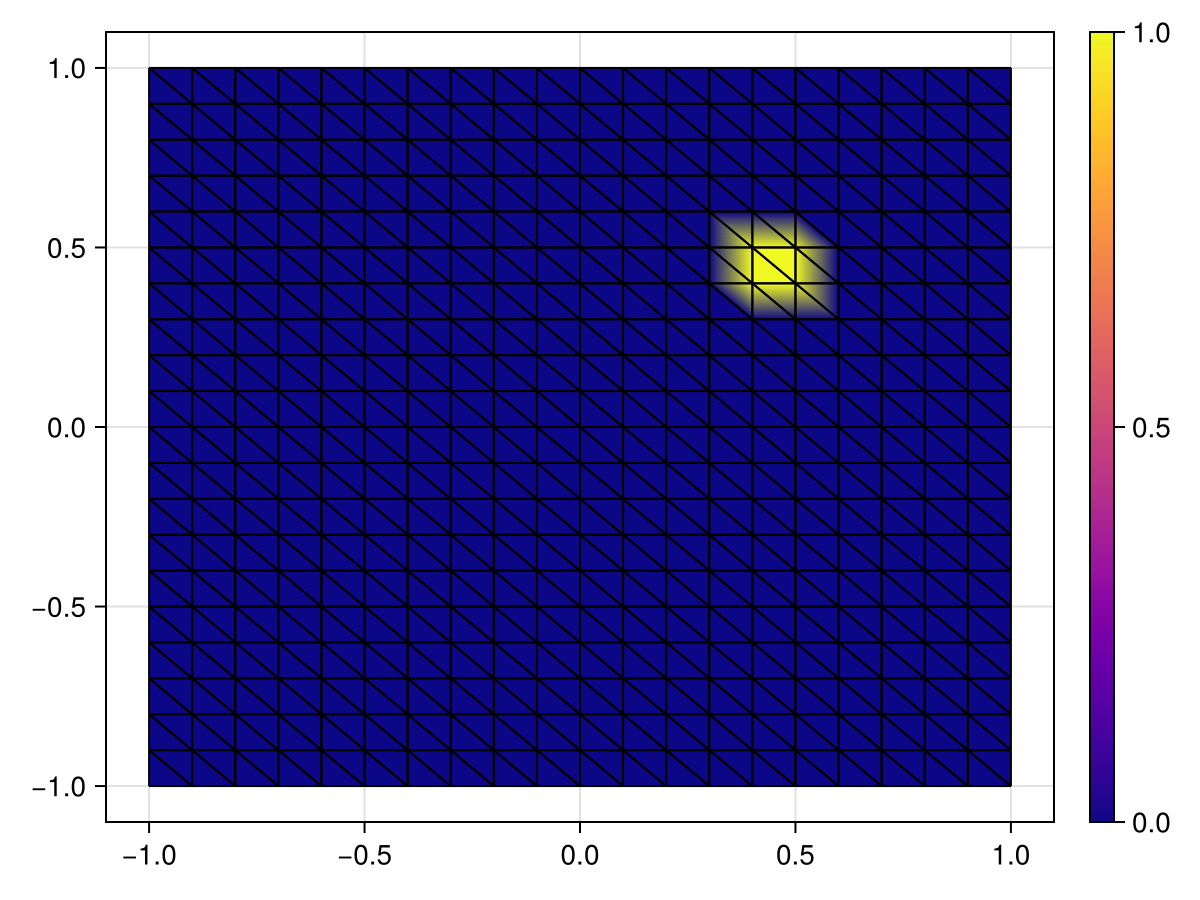

CairoMakie.Screen{IMAGE}


In [26]:
χ(x,a,b) = all(a .≤ x .≤ b) ? 1.0 : 0.0

χ([1,1],[0,0],[1,2])
Indikator(x)=χ(x,VectorValue([0.4,0.4]),VectorValue([0.6,0.6]))
Indikator(VectorValue([0.0,0.5]))
Ind=interpolate_everywhere(Indikator, Uspace(t0))
draw(Ind)

In [28]:
using Gridap
using GridapMakie
#using Makie

function 🌈(u;plotlabel="Temperature")
	fig = Figure(size=(800, 800))
	ax = Axis(fig[1,1], title="Time = 0.0")
	t0, u0 = u[1]
	plt = plot!(ax, Ω, u0, colormap=:viridis)
	Colorbar(fig[1,2], plt, label=plotlabel)
	print(u)
	min_T = min(min(collect(get_free_dof_values(uh))...) for (_, uh) in u)
	max_T = max(max(get_free_dof_values(uh)...) for (_, uh) in u)
	record(fig, "temperature_animation.mp4", 1:length(u)) do i
		t, uh = u[i]
		plt.input_args[1][] = uh  # Aktualisiere die Lösungsdaten
		ax.title = "Time = $(round(t, digits=2))"
		plt.colorrange = (min_T, max_T)
	end
end

#🌈(ps[1])
# min(get_free_dof_values(ps[1][1][2])...)

🌈 (generic function with 1 method)

In [ ]:
function savePVDall(ys, qs, ps)
    for k = 1:length(ys)
        if !isdir("tmpse$k")
            mkdir("tmpse$k")
        end
        createpvd("results_se$k") do pvd
            for (tn, uhn) in ys[k]
                pvd[tn] = createvtk(Ω, "tmpse$k/results_se{$k}_$tn" * ".vtu", cellfields=["u" => uhn])
            end
        end
    end
    for k = 1:length(ps)
        if !isdir("tmpadj$k")
            mkdir("tmpadj$k")
        end
        createpvd("results_adj$k") do pvd
            for (tn, uhn) in ps[k]
                pvd[tn] = createvtk(Ω, "tmpadj$k/results_adj{$k}_$tn" * ".vtu", cellfields=["u" => uhn])
            end
        end
    end
    for k = 1:length(qs)
        if !isdir("tmpcont$k")
            mkdir("tmpcont$k")
        end
        createpvd("results_cont$k") do pvd
            for (tn, uhn) in qs[k]
                pvd[tn] = createvtk(Ω, "tmpcont$k/results_cont{$k}_$tn" * ".vtu", cellfields=["u" => uhn])
            end
        end
    end
end

ysave = ys
qsave = qs
psave = ps
costsave = costs

savePVDall(ys, qs, ps)

In [42]:
using Gridap
using Gridap
using GridapMakie, CairoMakie, FileIO
using Gridap.FESpaces
using Gridap.ReferenceFEs
using Gridap.Arrays
using Gridap.Algebra
using Gridap.Geometry
using Gridap.Fields
using Gridap.CellData
using FillArrays
using Test
using InteractiveUtils

function GradientDescent(;solveSE, solveAE, spaces, dΩ, dΓ=nothing, Q, J, ∇f, iter_max=1000, tol=1e-3, Proj=x->x, u0=nothing, w=nothing, s_min=nothing, sminargs=nothing, armijoparas=(ρ=1/2, α_0=1, α_min=1/2^5, σ=1e-4), Δt=0.05, t0=0.0, tF, saveall::Bool=false)
	Trialspace, Testspace, Qspace = spaces                                  # Extract spaces

	q = [(t,interpolate_everywhere(Q(t),Qspace(t))) for t=t0:Δt:tF]   
	qfun(t)=find(q,t)
	println("q computed")

	y, cacheSE, A_SE = solveSE(Q,Trialspace,Testspace,w=w,dΩ=dΩ,dΓ=dΓ)  # initial SE solve
	#y = FEFunction(Trialspace, y_dof)
	yfun(t) = find(y,t)

	p, cacheAE, A_AE = solveAE(yfun,q,Trialspace,Testspace,dΩ=dΩ,dΓ=dΓ)      # initial AE solve
	#p = FEFunction(Testspace, p_dof)
	println("p computed")

	cost = J(y, q)
	fgrad =  ∇f(q, p, y)														# Compute initial gradient
	L2fgrad_save = L2norm(fgrad)                                       # Compute norm of initial gradient

	if saveall
		qs=[q]                     # save the solutions - only if really necessary
		ys=[y]
		ps=[p]
		costs=[cost]
	else
		qs,ys,ps=[],[],[]
	end
	for k=1:iter_max
		println("entered for loop, E=$cost")
		q_new = y_new = cost_new = nothing
		if s_min!=nothing                                                   # if method for exact step size is defined use that
			s = s_min(y,q,w,p,sminargs=(cacheSE,A_SE,sminargs))
			q_new = interpolate_everywhere(q - s*fgrad,Qspace) |> P			# in most cases interpolate instead of interpolate_everywhere works as well
			y_dof, cacheSE = solveSE(q_new,Trialspace,Testspace;w=w,dΩ=dΩ,dΓ=dΓ)
			y_new = FEFunction(Trialspace, y_dof)
			cost_new = J(y,q)
		else                                                                # else use Armijo rule - if projection is used, you should consider smaller step size than default
			ρ, α_0, α_min, σ = armijoparas
			cost_new = cost
			L2fgrad = L2fgrad_save
			α = α_0
			while α > α_min
				println("entered while loop")
				
				
				q_new = [(t,interpolate_everywhere((qfun(t) - α*grad)*q_pos, Qspace(t))) for (t,grad) in fgrad]   # Compute tentative new control function defined by current line search parameter
				
				qfun=t->find(q_new,t)

				y_new, cacheSE = solveSE(qfun,Trialspace,Testspace;w=w,dΩ=dΩ,dΓ=dΓ)
				#y_new = FEFunction(Trialspace, y_dof)

				cost_new = J(y_new, q_new)                                  # Compare decrease in functional and accept if sufficient
				if cost_new < cost - σ*α*L2fgrad^2
					break
				else
                    # α = α_min #TEST!!
					α *= ρ
				end
			end
			if α <= α_min
				println("Armijo rule failed")
				break
			end

		end# here you could implement other methods
		println("Armoijo success")
		q = q_new
		y = y_new
		cost = cost_new
		
		if k % 10 == 0
			println("iteration: $k")
		end
		if saveall
			push!(qs,q)
			push!(ys,y)
			push!(costs,cost)
		end
		yfun=t->find(y,t)
		p, cacheAE = solveAE(yfun,q,Trialspace,Testspace;dΩ=dΩ,dΓ=dΓ)
		#p = FEFunction(Testspace, p_dof)

		fgrad = ∇f(q, p, y)
		L2fgrad = L2norm(fgrad)
		push!(ps,p)

		if L2fgrad < tol*L2fgrad_save                           # loop break condition - better ideas are appreciated
			break
		end

	end
	return saveall ? (ys,qs,ps,costs) : (y,q,p,cost)                    	# give back either all saved variables or only end result
end



function χ(x, a, b)
    if a < x && x < b
        return 1
    else
        return 0
    end
end

# Set parameters and run the solver
domain = (-1, +1, -1, +1)
partition = (20, 20)
order = 1
degree = 2
Δt = 0.01
θ = 0.5
solver = ThetaMethod(LUSolver(), Δt, θ)
t0, tF = 0.0, 1.0

model = CartesianDiscreteModel(domain, partition) |> simplexify #Koden fungerer ikke uten simplexify....????
reffe = ReferenceFE(lagrangian, Float64, order)
Testspace = TestFESpace(model, reffe, conformity=:H1)
Trialspace = TransientTrialFESpace(Testspace)

Ω = Triangulation(model)
dΩ = Measure(Ω, degree)
Γ = BoundaryTriangulation(model)
dΓ = Measure(Γ, degree)

Uspace = FESpace(model, reffe, conformity=:H1)



q_pos(x) = χ(x[1], -0.9, -0.7) * χ(x[2], 0, 0.20) + χ(x[1], 0.2, 0.4) * χ(x[2], -0.5, 0)
q(t) = x -> χ(t,0.0,1.0)*1000.0*q_pos(x)


Tout(t) = x -> 4.0



ρ(x)=1
c(x)=1
k(x)=1
h(x)=1
Toutdoor(x,t)=5.0
Tout(t)=x->Toutdoor(x,t)
Q(x,t)=χ(t,0.0,1.0)*1000.0*q_pos(x)
Qt(t)=x->Q(x,t)
price(t)=1.0
Tini(x)=20.0
t0=0.0
tF=1.0
TIni=interpolate_everywhere(Tini, Uspace(t0))
Tfin=interpolate_everywhere(20.0, Uspace(tF))
Δt = 0.05

γ = 1

function solveSE(Qt,Trialspace,Testspace;w=nothing,dΩ,dΓ=nothing,cache=nothing,A=nothing,y_dof=fill(0.0, num_free_dofs(Testspace)))
    
    α(t) = x -> 1.0
    m(t, dtu, v) = ∫(v * dtu)*dΩ
    a(t, u, v) = ∫(α(t) * ∇(v) ⋅ ∇(u))*dΩ + ∫(u * v)*dΓ
    l(t, v) = ∫(q_pos*v * Qt(t))* dΩ + ∫(Tout(t) * v)*dΓ
    
    SEop_opt = TransientLinearFEOperator((a, m), l, Trialspace, Testspace, constant_forms=(true, true))
    T0 = interpolate_everywhere(20.0, Trialspace(t0))
    T = solve(solver, SEop_opt, t0, tF, T0)

    return [(t0,T0),collect((t,TT) for (t,TT) in T)...], 0.0,0.0  

end

function solveAE(T,Q,Trialspace,Testspace;dΩ,dΓ=nothing,cache=nothing,A=nothing,W_dof=fill(0.0, num_free_dofs(Testspace)))
    α(t) = x -> 1.0
    m_AE(t, dtu, v) = ∫(v * dtu)dΩ
    a_AE(t, u, v) = ∫(α(t) * ∇(v) ⋅ ∇(u))dΩ + ∫(u*v)dΓ # +??
    l_AE(t, v) = ∫(0.0*v)dΩ

    AEop_opt = TransientLinearFEOperator((a_AE, m_AE), l_AE, Trialspace, Testspace, constant_forms=(true, true))

    W_end = interpolate_everywhere(T(tF)-20.0,Trialspace(tF))  
    W = solve(solver, AEop_opt, t0, tF, W_end)


	return [collect((tF-t,w) for (t,w) in reverse(collect((t,WW) for (t,WW) in W)))... ; (tF,W_end)], 0.0,0.0
end

function E(T,Q)
	E=0.0
	for (QQ,t) in Q
		E+=Δt*price(t)^2*γ*∑(∫(QQ*QQ)*dΩ)
	end
	tmp = last(Q[1])-20
	E += γ* ∑(∫(tmp*tmp)*dΩ)
	# for (TT,t) in T
	# 	tmp=TT-20.0
	# 	E+=Δt*∑(∫(tmp*tmp)*dΩ) #The whole time?
	# 	println("Once")
	# end
	E = E/2.0
	return E
end
a = 0
b = 1000
Proj(a,b,z) = min(max(a,z),b)
# Proj(z) = map(x->Proj(a,b,x),z)

Proj(z) = [(t,FEFunction(Uspace,map(x->Proj(a,b,x), get_free_dof_values(zz)))) for (t,zz) in z]
# [(t,interpolate_everywhere(Uspace,map(x->Proj(a,b,x), Uspace(t)))) for (t,zz) in z]


∇e(Q::Vector{Tuple{Float64, SingleFieldFEFunction{GenericCellField{ReferenceDomain}}}},
T::Vector{Tuple{Float64, SingleFieldFEFunction{GenericCellField{ReferenceDomain}}}},
W::Vector{Tuple{Float64, SingleFieldFEFunction{GenericCellField{ReferenceDomain}}}}) = [(Q[k][1],2*price(T[k][1])^2*Q[k][2]-W[k][2]) for k=1:length(Q)]                                                # gradient of reduced cost
function ∇e(Qt::Function,
T::Vector{Tuple{Float64, SingleFieldFEFunction{GenericCellField{ReferenceDomain}}}},
W::Vector{Tuple{Float64, SingleFieldFEFunction{GenericCellField{ReferenceDomain}}}})
	println(T)
	println(W)
	return collect((T[k][1],interpolate_everywhere(2*price(T[k][1])^2*Qt(T[k][1])-W[k][2],Uspace(T[k][1]))) for k=1:length(W))
end

function find(y,s)
	tsave,ysave=t0,nothing
	for (t,yy) in y
		ysave=yy
		break
	end
	for (t,yy) in y
		# if t≈t0
		# 	ysave=yy
		# 	tsave=t0
		# end
		if t≈s
			return yy
		elseif t ≥ s
			return interpolate_everywhere(((s-tsave)*ysave+(t-s)*yy)/Δt, Uspace(s))
		end
		tsave,ysave = t,yy
	end
end


function s_min(y,q,w,p;sminargs)
	cache,A=sminargs
	v=interpolate(-y*p+γ*q, Uspace)                                      # v=p+γ*u, since all uses of v are in norms we can ignore the minus
	Sv,_ = SEsolver(v,Trialspace,Testspace;dΩ=dΩ,cache=cache,A=A)
	Sv = FEFunction(Trialspace,Sv)
	L2NormSquaredOfv = ∑(∫(v*v)*dΩ)                                   # ||v||^2
	return L2NormSquaredOfv/(∑(∫(Sv*Sv)*dΩ)+γ*L2NormSquaredOfv)
end

L2norm(u)=√((tF-t0)*∑(Δt*∑(∫(uu⋅uu)*dΩ) for (t,uu) in u))

(ys,qs,ps,costs) = GradientDescent(;solveSE=solveSE, 
solveAE=solveAE, 
spaces=(Trialspace, Testspace, Uspace), 
dΩ=dΩ, 
dΓ=dΓ, 
Q=Qt, 
J=E, 
∇f=∇e, 
Proj=Proj, 
s_min=nothing,
sminargs=nothing, 
saveall=true, 
tol=1e-5, 
iter_max=4, 
armijoparas=(ρ=1/2, α_0=1, α_min=1/2^20, σ=1e-4), 
Δt=Δt, 
t0=t0, 
tF=tF)

q computed
p computed
entered for loop, E=800.7175
entered while loop
entered while loop
Armoijo success
entered for loop, E=776.7175
entered while loop
entered while loop
entered while loop
entered while loop
entered while loop
entered while loop
entered while loop
entered while loop
entered while loop
entered while loop
entered while loop
entered while loop
entered while loop
entered while loop
entered while loop
entered while loop
entered while loop
entered while loop
entered while loop
entered while loop
Armijo rule failed


(Vector{Tuple{Float64, SingleFieldFEFunction{GenericCellField{ReferenceDomain}}}}[[(0.0, SingleFieldFEFunction()), (0.01, SingleFieldFEFunction()), (0.02, SingleFieldFEFunction()), (0.03, SingleFieldFEFunction()), (0.04, SingleFieldFEFunction()), (0.05, SingleFieldFEFunction()), (0.060000000000000005, SingleFieldFEFunction()), (0.07, SingleFieldFEFunction()), (0.08, SingleFieldFEFunction()), (0.09, SingleFieldFEFunction())  …  (0.9100000000000006, SingleFieldFEFunction()), (0.9200000000000006, SingleFieldFEFunction()), (0.9300000000000006, SingleFieldFEFunction()), (0.9400000000000006, SingleFieldFEFunction()), (0.9500000000000006, SingleFieldFEFunction()), (0.9600000000000006, SingleFieldFEFunction()), (0.9700000000000006, SingleFieldFEFunction()), (0.9800000000000006, SingleFieldFEFunction()), (0.9900000000000007, SingleFieldFEFunction()), (1.0000000000000007, SingleFieldFEFunction())], [(0.0, SingleFieldFEFunction()), (0.01, SingleFieldFEFunction()), (0.02, SingleFieldFEFunction()),

In [44]:
get_node_coordinates(Ω)

441-element Vector{VectorValue{2, Float64}}:
                 VectorValue{2, Float64}(-1.0, -1.0)
                 VectorValue{2, Float64}(-0.9, -1.0)
                 VectorValue{2, Float64}(-0.8, -1.0)
                 VectorValue{2, Float64}(-0.7, -1.0)
                 VectorValue{2, Float64}(-0.6, -1.0)
                 VectorValue{2, Float64}(-0.5, -1.0)
  VectorValue{2, Float64}(-0.3999999999999999, -1.0)
 VectorValue{2, Float64}(-0.29999999999999993, -1.0)
 VectorValue{2, Float64}(-0.19999999999999996, -1.0)
 VectorValue{2, Float64}(-0.09999999999999998, -1.0)
                            ⋮
   VectorValue{2, Float64}(0.20000000000000018, 1.0)
   VectorValue{2, Float64}(0.30000000000000004, 1.0)
   VectorValue{2, Float64}(0.40000000000000013, 1.0)
                   VectorValue{2, Float64}(0.5, 1.0)
    VectorValue{2, Float64}(0.6000000000000001, 1.0)
    VectorValue{2, Float64}(0.7000000000000002, 1.0)
                   VectorValue{2, Float64}(0.8, 1.0)
    VectorValue{2, Float

In [61]:
# Hilfsfunktion: Wendet die Indikatorfunktion auf eine FEFunction an
function apply_indicator(u, indicator)
    # Freie DOFs der FE-Funktion
	(t,uh)=first(u)
    free_values = get_free_dof_values(uh)
    
    # Koordinaten der Freiheitsgrade (DOFs) im FE-Raum
    trian = get_triangulation(u[1][2])
    node_coords = get_node_coordinates(trian)
    free_dofs = get_free_dof_ids(Uspace)
    
    # Maskierungsvektor erstellen
    mask = zeros(length(free_values))
    for (i, dof) in enumerate(free_dofs)
        x = node_coords[dof]
        mask[i] = indicator(x)
    end
    
    # Neue FEFunction mit maskierten Werten
    new_free_values = free_values .* mask
    return [(t,FEFunction(Uspace, new_free_values)) for (t, uh) in u]
end

function indicator(x)
    x₁, x₂ = x
    return (0.2 ≤ x₁ ≤ 0.4) && (-0.4 ≤ x₂ ≤ -0.4) ? 1.0 : 0.0
end

# 4. Indikator auf die FE-Funktion anwenden
uh_indicator = apply_indicator(qs[end], indicator)

# 5. Ergebnisse exportieren
if !isdir("tmpq")
	mkdir("tmpq")
end
createpvd("results_q") do pvd
	for (tn, uhn) in qs[end]
		pvd[tn] = createvtk(Ω, "tmpq/results_q_$tn" * ".vtu", cellfields=["u" => uhn])
	end
end
if !isdir("tmpqindicator")
	mkdir("tmpqindicator")
end
createpvd("results_qindicator") do pvd
	for (tn, uhn) in uh_indicator
		pvd[tn] = createvtk(Ω, "tmpqindicator/results_qindicator_$tn" * ".vtu", cellfields=["u" => uhn])
	end
end



22-element Vector{String}:
 "results_qindicator.pvd"
 "tmpqindicator/results_qindicator_0.0.vtu"
 "tmpqindicator/results_qindicator_0.05.vtu"
 "tmpqindicator/results_qindicator_0.1.vtu"
 "tmpqindicator/results_qindicator_0.15.vtu"
 "tmpqindicator/results_qindicator_0.2.vtu"
 "tmpqindicator/results_qindicator_0.25.vtu"
 "tmpqindicator/results_qindicator_0.3.vtu"
 "tmpqindicator/results_qindicator_0.35.vtu"
 "tmpqindicator/results_qindicator_0.4.vtu"
 ⋮
 "tmpqindicator/results_qindicator_0.6.vtu"
 "tmpqindicator/results_qindicator_0.65.vtu"
 "tmpqindicator/results_qindicator_0.7.vtu"
 "tmpqindicator/results_qindicator_0.75.vtu"
 "tmpqindicator/results_qindicator_0.8.vtu"
 "tmpqindicator/results_qindicator_0.85.vtu"
 "tmpqindicator/results_qindicator_0.9.vtu"
 "tmpqindicator/results_qindicator_0.95.vtu"
 "tmpqindicator/results_qindicator_1.0.vtu"